# Sentiment Analysis with Natural Language Processing

### **Natural Language Processing with TensorFlow:**

<img src="https://camo.githubusercontent.com/f7e2c4afbb6b72870b81cdd3b09fa6869c90f74753a2693ce90b911f9413c41e/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30382d6578616d706c652d6e6c702d70726f626c656d732e706e67"/>

The main goal of [natural language processing (NLP)](https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32) is to derive information from natural language.

Natural language is a broad term but you can consider it to cover any of the following:

* Text (such as that contained in an email, blog post, book, Tweet)
* Speech (a conversation you have with a doctor, voice commands you give to a smart speaker)
Under the umbrellas of text and speech there are many different things you might want to do.

If you're building an email application, you might want to scan incoming emails to see if they're spam or not spam (classification).

If you're trying to analyse customer feedback complaints, you might want to discover which section of your business they're for.

### Topics covered:

* Downloading the food data.
* Visualizing the food related text data.
* Converting the text into numbers using tokenization.
* Turning our tokenized text into an embedding.
* Modelling the food text dataset.
  * Starting with a baseline model for comparison.
  * Building several deep learning models.
    * LSTM, GRU
* Comparing the performance of each our models.

### Check for GPU

In [1]:
# Check for GPU
!nvidia-smi -L

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


Importing helper functions

In [2]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

### Download the text dataset

Let's start by downloading the dataset. We'll be using the [Datasets for natural language processing](https://www.kaggle.com/datasets/toygarr/datasets-for-natural-language-processing)

## Visualizing the food text data

In [ ]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("data/food/train.csv")
test_df = pd.read_csv("data/food/test.csv")
train_df.head()

,text,Y
0,i was put off at first by the green powder but...,1
1,these ginger chews are too good to be true i t...,1
2,i love salt and use a variety of salts to keep...,1
3,if asked to sum up this coffee pod drawer in o...,1
4,so far my dog has tried the chicken and peanut...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,text,Y
139408,i am absolutely addicted to this tea i made th...,1
200933,i was happy to find this vegan alternative to ...,0
119706,my maltese dogs loved these duck yams i purcha...,1
90324,i have tried every indian sauce on the market ...,1
193956,i have already written heinz and told them i l...,1


Notice how the training data has a "Y" column.

We're going to be writing code to find patterns (e.g. different combinations of words) in the "text" column of the training dataset to predict the value of the "Y" column.

In [ ]:
test_df.head()

,text,Y
0,this is the perfect blend of spice and sweet i...,1
1,the only coffee shop in town that carried big ...,1
2,this was a great price but amazon is not going...,1
3,while i love this product i feel disappointed ...,1
4,i have color treated hair and wanted to try th...,0


In [ ]:
# How many examples of each class?
train_df.Y.value_counts()

1    183739
0     34187
Name: Y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


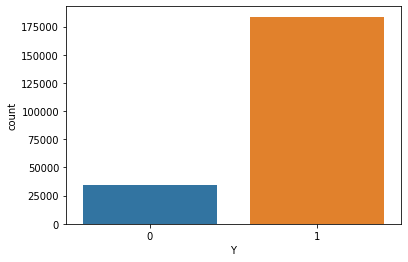

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.countplot(train_df['Y'])
g.set_xticklabels(['0','1'])
plt.show()

## This is an imbalanced dataset

So, in order to balance the dataset we are going to apply random undersampaling to the train dataset.

In [ ]:
Y_0 = train_df[train_df.Y == 0]
Y_1 = train_df[train_df.Y == 1]

In [ ]:
print(Y_0.shape, Y_1.shape)

(34187, 2) (183739, 2)


In [ ]:
Y_1_sample = Y_1.sample(n=34187)

In [ ]:
train_df_under_sampled = pd.concat([Y_0, Y_1_sample], axis=0)

In [ ]:
train_df_under_sampled.head()

,text,Y
23,i love the flower teasi purchase them often fr...,0
27,this is a great and attentive company attends ...,0
35,i do not mind subtle but i thought outside of ...,0
37,while i have liked the other products in this ...,0
38,ordered dozen red roses and was assured delive...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


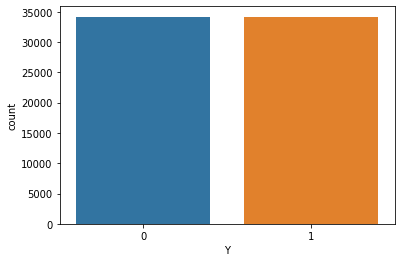

In [ ]:
g = sns.countplot(train_df_under_sampled['Y'])
g.set_xticklabels(['0','1'])
plt.show()

In [ ]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 217926
Total test samples: 145293
Total samples: 363219


In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "Y"]][random_index:random_index+5].itertuples():
  _, text, Y = row
  print(f"Target: {Y}", "(positive)" if Y > 0 else "(negative)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (positive)
Text:
i bought a couple of bags of french roast beans and i love it i grind my own very fine because i love a full bodied cup of coffee in fact i decided to buy more while it was on sale 

---

Target: 1 (positive)
Text:
i discovered the knorr fix line of products about a year ago our family has been sampling them little by little and this is one of the standouts whether you like to pan fry your burger or grill em up this seasoning is the best we have ever tried we were lawrey is fans for years and still are but this beats them down no contest 

---

Target: 1 (positive)
Text:
some people want to criticize organic products due to their often higher than average cost i am not sure i agree with that thinking organic ingredients are more expensive and their added cost ensures that you and your pets are eating food that meets strict production standards is it worth it well consider the source of the ingredients in most pet food i shudder to think about the junk that ma

In [ ]:
# Shuffle training dataframe
train_df_shuffled_under_sampled = train_df_under_sampled.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled_under_sampled.head()

,text,Y
153141,i had asked for mazipan for christmas and rece...,0
136205,the same exact product is available directly f...,1
137314,bought from mfs wholesale came melted and brok...,0
113584,whole life freeze dried chicken is a little pr...,1
200743,delicious i was in publix yesterday and saw th...,1


### Split data into training and validation sets

Since the test set has no labels and we need a way to evalaute our trained models, we'll split off some of the training data and create a validation set.

We'll convert our splits from pandas Series datatypes to lists of strings (for the text) and lists of ints (for the labels) for ease of use later.

To split our training dataset and create a validation dataset, we'll use Scikit-Learn's `train_test_split()` method and dedicate 10% of the training samples to the validation set.

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled_under_sampled["text"].to_numpy(),
                                                                            train_df_shuffled_under_sampled["Y"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproduci

In [ ]:

# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(61536, 61536, 6838, 6838)

In [ ]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['the noodles are great easy to cook and delicious just need more recipes to use them good purchase ',
        'i tried wellness and evo but my puppy had loose stool so i studied and gave orijin puppy food my puppy is stool got worse and she refuse to eat orijin puppy food now i have changed to other brand dehydrated food addiction she likes it and seems working well so far maybe orijin was too much protein to her i liked orijin product so i was bit disappointed maybe when she gets bigger i may try adult orijin ',
        'after being warned by another review that reported their shipment was missing items i took a chance anyway because my daughter really wanted a venus fly trap i figured that out of plants arriving was not bad for the price i was willing to pay since they were so highly desired out of three plants arrived as others had warned who knows what happened to the third plant because my daughter was thrilled with the two that did arrive i will leave this review to warn 

## Converting text into numbers

Wonderful! We've got a training set and a validation set containing Tweets and labels.

Our labels are in numerical form (`0` and `1`) but our Texts are in string form.

In NLP, there are two main concepts for turning text into numbers:

* Tokenization - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
  1. Using **word-level tokenization** with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.
  2. **Character-level tokenization**, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.
  3. **Sub-word tokenization** is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple **tokens**.

* **Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a **feature vector**. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
  1. **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as `tf.keras.layers.Embedding`) and an embedding representation will be learned during model training.
  2. **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

## Text vectorization (tokenization)

To tokenize our words, we'll use the helpful preprocessing layer `tf.keras.layers.experimental.preprocessing.TextVectorization`.

The TextVectorization layer takes the following parameters:

`max_tokens` - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
`standardize` - Method for standardizing text. Default is `"lower_and_strip_punctuation"` which lowers text and removes all punctuation marks.
`split` - How to split text, default is `"whitespace"` which splits on spaces.
`ngrams` - How many words to contain per token split, for example, ngrams=2 splits tokens into continuous sequences of 2.
`output_mode` - How to output tokens, can be `"int"` (integer mapping), `"binary"` (one-hot encoding), "count" or `"tf-idf"`. See documentation for more.
`output_sequence_length` - Length of tokenized sequence to output. For example, if output_sequence_length=150, all tokenized sequences will be 150 tokens long.
`pad_to_max_tokens` - Defaults to False, if True, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocabulary is less than `max_tokens`. Only valid in certain modes, see docs for more.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

We've initialized a TextVectorization object with the default settings but let's customize it a little bit for our own use case.

In particular, let's set values for max_tokens and output_sequence_length.

For max_tokens (the number of words in the vocabulary), multiples of 10,000 (10,000, 20,000, 30,000) or the exact number of unique words in your text (e.g. 32,179) are common values.

For our use case, we'll use 10,000.

And for the output_sequence_length we'll use the average number of tokens per Tweet in the training set. But first, we'll need to find it.

In [ ]:

# Find average number of tokens (words) in training texts
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

81

In [ ]:
max_vocab_length = 50000 # max number of words to have in our vocabulary
max_length = 81 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 81), dtype=int64, numpy=
array([[ 7248,     5, 13866,    12,    15,  4072,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
according to the tracking info the package was delivered but i never received it i reached out to customer service they dismissed me and offered no assistance including refusing to contact the postal service to file a claim thanks to amazon i was able to get my money back however as a first time customer i would expect some assistance and support       

Vectorized version:


<tf.Tensor: shape=(1, 81), dtype=int64, numpy=
array([[ 1249,     7,     2,  3778,  1717,     2,   185,    17,   811,
           18,     3,   129,   196,     6,     3,  4408,    56,     7,
          543,   526,    22, 11434,    51,     4,  1143,    55,  8009,
          824,  7084,     7,  1400,     2,  6939,   526,     7,  6152,
            5,  1369,   615,     7,    72,     3,    17,   380,     7,
           59,    15,   189,   146,   165,    24,     5,    99,    80,
          543,     3,    34,   642,    68,  8009,     4,  2006,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 48959
Top 5 most common words: ['', '[UNK]', 'the', 'i', 'and']
Bottom 5 least common words: ['aaaah', 'aaaaallll', 'aaaaaahhhhhyaaaaaa', 'aaaaaahhhhh', 'aaaaaa']


## Creating an Embedding using an Embedding Layer

We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. 1 = I, 2 = love, 3 = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.

The main parameters we're concerned about here are:

* input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
* output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
* embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* input_length - Length of sequences being passed to embedding layer.


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
i use this for homemade lemonade daily i make mine with the yellow sugar substitute but you can get the same thing for at costco if you are lucky enough to be near one       

Embedded version:


<tf.Tensor: shape=(1, 81, 128), dtype=float32, numpy=
array([[[-0.04284013, -0.01489798, -0.0159496 , ..., -0.01166106,
          0.03061062,  0.01972148],
        [-0.02213949, -0.03946913,  0.03560385, ...,  0.04807695,
          0.01491269, -0.03690983],
        [-0.02399485,  0.01468222,  0.00041829, ...,  0.02498427,
         -0.02674054, -0.00808267],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.04284013, -0.01489798, -0.0159496 , -0.0226305 ,  0.04298959,
       -0.04682324, -0.0026353 ,  0.01123267, -0.03430966, -0.00190909,
        0.02867594,  0.0297017 ,  0.02498296,  0.00814937,  0.04493314,
        0.04413916, -0.00577633,  0.03141482,  0.00966071, -0.04037346,
        0.03765199, -0.01732815, -0.02747819, -0.02993454, -0.02981216,
        0.0308927 , -0.02260027, -0.00124929,  0.01732543, -0.02180376,
       -0.03130232, -0.04009864,  0.03664006, -0.01028627, -0.03222132,
        0.00378202, -0.02535181, -0.00505129,  0.02522682, -0.01333591,
        0.0391151 , -0.00091956,  0.02860123, -0.04375963,  0.01296742,
        0.0263852 , -0.04896233, -0.04747603,  0.04653648,  0.01485529,
       -0.04613405,  0.00209745, -0.00271541,  0.03082445,  0.04200928,
       -0.04887832, -0.04972835, -0.0254328 ,  0.03892423, -0.02046248,
       -0.0439718 , -0.0345499 , -0.0287706 ,  0.03040506,  0.03975679,
        0.020090

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the [Multinomial Naive Bayes algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). This was chosen via referring to the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 87.06%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

## Creating an evaluation function for our model experiments
We could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following:

* Accuracy
* Precision
* Recall
* F1-score
> 🔑 Note: Since we're dealing with a classification problem, the above metrics are the most appropriate. If we were working with a regression problem, other metrics such as MAE (mean absolute error) would be a better choice.

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 87.05761918689674,
 'f1': 0.8705758015899729,
 'precision': 0.8706576729400801,
 'recall': 0.8705761918689675}

## Recurrent Neural Networks (RNN's)
For our next series of modelling experiments we're going to be using a special kind of neural network called a **Recurrent Neural Network (RNN)**.

The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input (X) and compute an output (y) based on all previous inputs.

This concept is especially helpful when dealing with sequences such as passages of natural language text (such as our Tweets).

For example, when you read this sentence, you take into context the previous words when deciphering the meaning of the current word dog.

See what happened there?

I put the word "dog" at the end which is a valid word but it doesn't make sense in the context of the rest of the sentence.

When an RNN looks at a sequence of text (already in numerical form), the patterns it learns are continually updated based on the order of the sequence.

For a simple example, take two sentences:

1. Massive earthquake last week, no?
2. No massive earthquake last week.

Both contain exactly the same words but have different meaning. The order of the words determines the meaning (one could argue punctuation marks also dictate the meaning but for simplicity sake, let's stay focused on the words).

Recurrent neural networks can be used for a number of sequence-based problems:

* One to one: one input, one output, such as image classification.
* One to many: one input, many outputs, such as image captioning (image input, a sequence of text as caption output).
* Many to one: many inputs, one outputs, such as text classification (classifying a Tweet as real diaster or not real diaster).
* Many to many: many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text (audio wave as input, text as output).

When you come across RNN's in the wild, you'll most likely come across variants of the following:

* Long short-term memory cells (LSTMs).
* Gated recurrent units (GRUs).
* Bidirectional RNN's (passes forward and backward along a sequence, left to right and right to left).

Going into the details of each these is beyond the scope of this notebook (we're going to focus on using them instead), the main thing you should know for now is that they've proven very effective at modelling sequences.

For a deeper understanding of what's happening behind the scenes of the code we're about to write, I'd recommend the following resources:

>📖 Resources:
  * [MIT Deep Learning Lecture on Recurrent Neural Networks](https://youtu.be/SEnXr6v2ifU) - explains the background of recurrent neural networks and introduces LSTMs.
  * [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) by Andrej Karpathy - demonstrates the power of RNN's with examples generating various sequences.
  * [Understanding LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) by Chris Olah - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.

## Model 1: LSTM

With all this talk of what RNN's are and what they're good for, I'm sure you're eager to build one.

We're going to start with an LSTM-powered RNN.

To harness the power of the LSTM cell (LSTM cell and LSTM layer are often used interchangably) in TensorFlow, we'll use `tensorflow.keras.layers.LSTM()`.

nput (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

The main difference will be that we're going to add an LSTM layer between our embedding and output.

And to make sure we're not getting reusing trained embeddings (this would involve data leakage between models, leading to an uneven comparison later on), we'll create another embedding layer (model_1_embedding) for our model. The text_vectorizer layer can be reused since it doesn't get updated during training.


In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_1_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_1")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_1_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_LSTM")

(None, 81, 128)
(None, 64)


In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model_1_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 81)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 81, 128)           6400000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 6,449,473
Trainable params: 6,449,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

# Fit model

model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20220806-111734
Epoch 1/5
1923/1923 [==============================] - 28s 11ms/step - loss: 0.6323 - accuracy: 0.6475 - val_loss: 0.6324 - val_accuracy: 0.6271
Epoch 2/5
1923/1923 [==============================] - 21s 11ms/step - loss: 0.4467 - accuracy: 0.7870 - val_loss: 0.3233 - val_accuracy: 0.8641
Epoch 3/5
1923/1923 [==============================] - 21s 11ms/step - loss: 0.2374 - accuracy: 0.9058 - val_loss: 0.2849 - val_accuracy: 0.8836
Epoch 4/5
1923/1923 [==============================] - 20s 10ms/step - loss: 0.1642 - accuracy: 0.9380 - val_loss: 0.2946 - val_accuracy: 0.8834
Epoch 5/5
1923/1923 [==============================] - 21s 11ms/step - loss: 0.1155 - accuracy: 0.9592 - val_loss: 0.3585 - val_accuracy: 0.8736


In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape, model_1_pred_probs[:10]

((6838, 1), array([[0.981998  ],
        [0.994418  ],
        [0.99846184],
        [0.05309127],
        [0.00378915],
        [0.00191134],
        [0.99744487],
        [0.00857504],
        [0.00796135],
        [0.98579454]], dtype=float32))

In [ ]:
# Round out predictions and reduce to 1-dimensional array
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 0., 1., 0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate LSTM model results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 87.36472652822462,
 'f1': 0.8736484759131308,
 'precision': 0.8736592529261012,
 'recall': 0.8736472652822462}

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 87.06, New accuracy: 87.36, Difference: 0.31
Baseline precision: 0.87, New precision: 0.87, Difference: 0.00
Baseline recall: 0.87, New recall: 0.87, Difference: 0.00
Baseline f1: 0.87, New f1: 0.87, Difference: 0.00


In [ ]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_1_results)

Baseline accuracy: 87.06, New accuracy: 87.36, Difference: 0.31
Baseline precision: 0.87, New precision: 0.87, Difference: 0.00
Baseline recall: 0.87, New recall: 0.87, Difference: 0.00
Baseline f1: 0.87, New f1: 0.87, Difference: 0.00
